<a href="https://colab.research.google.com/github/harshu722/ML-AI-personal-1/blob/main/Object_Detection_Using_Machine_Learning_and_Whatsapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# With image for object detection

**Completed and Practiced By Kolluru Saharsh**
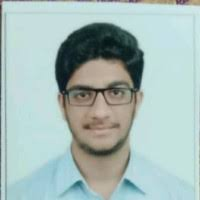


In [10]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt

# Load the image
image_path = 'ML IMP.jpg'
image = cv2.imread('C:\Users\saharsh\OneDrive\Pictures)

if image is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    # Perform object detection
    bbox, labels, conf = cv.detect_common_objects(image)

    # Draw bounding boxes around detected objects
    output_image = draw_bbox(image, bbox, labels, conf)

    # Save the output image
    output_image_path = 'detected_people.jpeg'
    cv2.imwrite(output_image_path, output_image)
    print(f"Image saved as {output_image_path}")

    # Display the image in Colab using matplotlib
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

    # Commented out the pywhatkit part to isolate the error
    """
    phone_number = '+919430732682'
    message = "Here is the detected object image!"

    try:
        print("Attempting to send the image...")
        kit.sendwhats_image(phone_number, output_image_path, message, wait_time=20)
        print("Image sent successfully!")
    except Exception as e:
        print(f"An error occurred: {e}")
    """


Error: Image not loaded. Please check the file path.


In [14]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt

# Load the uploaded image
image_path = 'ML IMP.jpg'  # The file you uploaded
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    # Ensure the YOLOv4 configuration and weights are downloaded
    !wget -q --show-progress https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg
    !wget -q --show-progress https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
    !wget -q --show-progress https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names

    # Perform object detection using YOLOv4
    bbox, labels, conf = cv.detect_common_objects(image, model='yolov4', config_path='yolov4.cfg', weights_path='yolov4.weights', labels_path='coco.names')

    # Draw bounding boxes around detected objects
    output_image = draw_bbox(image, bbox, labels, conf)

    # Save the output image
    output_image_path = 'detected_people.jpeg'
    cv2.imwrite(output_image_path, output_image)
    print(f"Image saved as {output_image_path}")

    # Display the image in Colab using matplotlib
    plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()


yolov4.cfg.1        100%[===================>]  11.94K  --.-KB/s    in 0.001s  
yolov4.weights      100%[===================>] 245.78M  84.8MB/s    in 2.9s    
coco.names.1        100%[===================>]     625  --.-KB/s    in 0s      


TypeError: detect_common_objects() got an unexpected keyword argument 'config_path'

Image saved as detected_people_yolo.jpeg


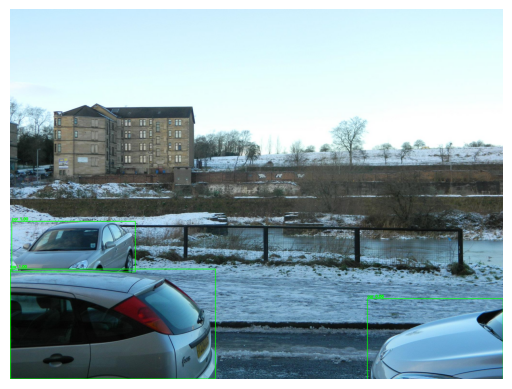

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'ML IMP.jpg'
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    net = cv2.dnn.readNet('yolov4.weights', 'yolov4.cfg')

    with open('coco.names', 'r') as f:
        classes = [line.strip() for line in f.readlines()]


    height, width = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)


    layer_names = net.getLayerNames()


    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]

    detections = net.forward(output_layers)

    class_ids = []
    confidences = []
    boxes = []
    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)


                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = (0, 255, 0)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, f'{label} {confidence:.2f}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


    output_image_path = 'detected_people_yolo.jpeg'
    cv2.imwrite(output_image_path, image)
    print(f"Image saved as {output_image_path}")


    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


Image saved as detected_people_yolo.jpeg


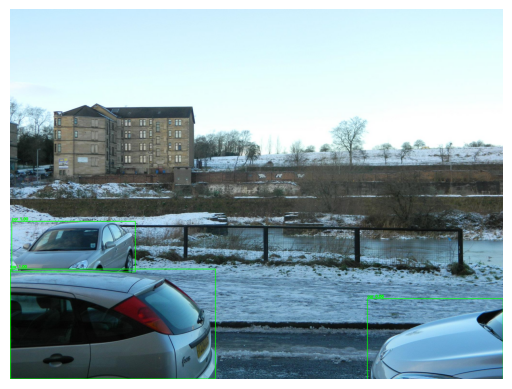

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = 'ML IMP.jpg'  # This File is Uploaded By K.Saharsh
image = cv2.imread(image_path)

if image is None:
    print("Error: Image not loaded. Please check the file path.")
else:
    net = cv2.dnn.readNet('yolov4.weights', 'yolov4.cfg')

    with open('coco.names', 'r') as f:
        classes = [line.strip() for line in f.readlines()]

    height, width = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]
    detections = net.forward(output_layers)
    class_ids = []
    confidences = []
    boxes = []
    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = (0, 255, 0)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, f'{label} {confidence:.2f}', (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


    output_image_path = 'detected_people_yolo.jpeg'
    cv2.imwrite(output_image_path, image)
    print(f"Image saved as {output_image_path}")
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()


In [15]:
!ls -lh yolov4.cfg yolov4.weights coco.names


-rw-r--r-- 1 root root  625 Oct 22 06:03 coco.names
-rw-r--r-- 1 root root  12K Oct 22 06:03 yolov4.cfg
-rw-r--r-- 1 root root 246M Dec  8  2021 yolov4.weights


In [12]:
!wget https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg
!wget https://pjreddie.com/media/files/yolov4.weights
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names


--2024-10-22 06:03:21--  https://raw.githubusercontent.com/AlexeyAB/darknet/master/cfg/yolov4.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12231 (12K) [text/plain]
Saving to: ‘yolov4.cfg’

yolov4.cfg          100%[===================>]  11.94K  --.-KB/s    in 0s      

2024-10-22 06:03:21 (33.1 MB/s) - ‘yolov4.cfg’ saved [12231/12231]

--2024-10-22 06:03:21--  https://pjreddie.com/media/files/yolov4.weights
Resolving pjreddie.com (pjreddie.com)... 162.0.215.52
Connecting to pjreddie.com (pjreddie.com)|162.0.215.52|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-10-22 06:03:21 ERROR 404: Not Found.

--2024-10-22 06:03:22--  https://raw.githubusercontent.com/pjreddie/darknet/master/data/coco.names
Resolving raw.githubuserco

In [3]:
!pip install cvlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 83.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for cvlib: filename=cvlib-0.2.7-py3-none-any.whl size=10046369 sha256=6b71f31503ff9554c073b2d1c4afaa17816e83ec37ac274b541e2dcd97ce9442
  Stored in directory: /root/.cache/pip/wheels/9e/a5/d4/fe37b48fe4f4b621ba5e574a991230070f3cc4f02322a01489
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12066 sha256=4fd37fa5c641b0366f1dcb1eccb9d26c3aaa0b168ca7669ee385cc0586ed15d7
  Stored in directory: /root/.cache/pip/wheels/cd/17/e5/765d1a3112ff3978f70223502f6047e06c43a24d7c5f8ff95b
Successfully built cvlib progressbar


In [5]:
!pip install pywhatkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.8/132.8 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for pyautogui: filename=PyAutoGUI-0.9.54-py3-none-any.whl size=37577 sha256=1e38a12351709

# From Webcam

Output image saved as output_yolo_detection.jpeg


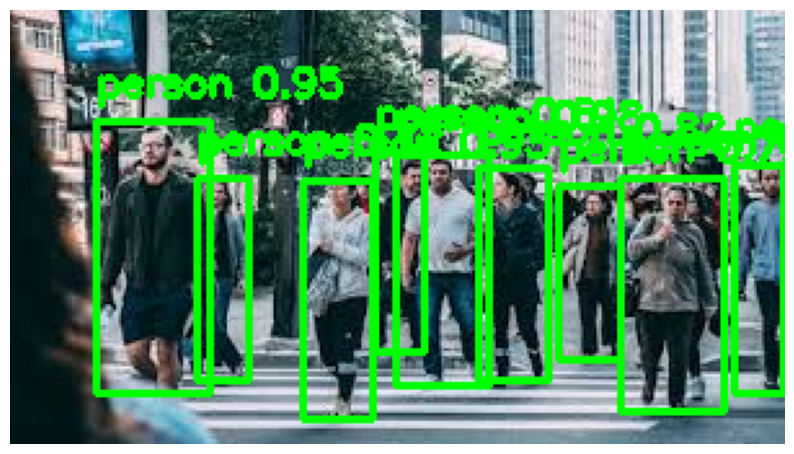

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_yolo_model(config_path, weights_path, classes_path):
    net = cv2.dnn.readNet(weights_path, config_path)
    with open(classes_path, 'r') as f:
        classes = [line.strip() for line in f.readlines()]
    return net, classes

def detect_objects(image, net, classes, confidence_threshold=0.5, nms_threshold=0.4):
    height, width = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]
    detections = net.forward(output_layers)
    class_ids, confidences, boxes = [], [], []
    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > confidence_threshold:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, nms_threshold)
    return boxes, confidences, class_ids, indices

def draw_bounding_boxes(image, boxes, confidences, class_ids, indices, classes):
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = (0, 255, 0)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, f'{label} {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

def main(image_path, output_image_path='output_yolo_detection.jpeg'):
    config_path = 'yolov4.cfg'
    weights_path = 'yolov4.weights'
    classes_path = 'coco.names'

    net, classes = load_yolo_model(config_path, weights_path, classes_path)
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not loaded. Please check the file path.")
        return

    boxes, confidences, class_ids, indices = detect_objects(image, net, classes)
    draw_bounding_boxes(image, boxes, confidences, class_ids, indices, classes)
    cv2.imwrite(output_image_path, image)
    print(f"Output image saved as {output_image_path}")
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

image_path = 'Saharshimage.jpg'
main(image_path)


Output image saved as output_yolo_detection.jpeg


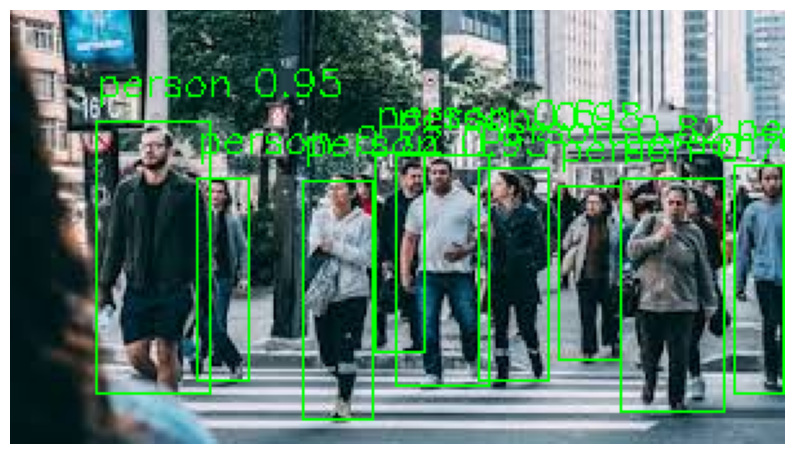

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_yolo_model(config_path, weights_path, classes_path):
    net = cv2.dnn.readNet(weights_path, config_path)
    with open(classes_path, 'r') as f:
        classes = [line.strip() for line in f.readlines()]
    return net, classes

def detect_objects(image, net, classes, confidence_threshold=0.5, nms_threshold=0.4):
    height, width = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers().flatten()]
    detections = net.forward(output_layers)
    class_ids, confidences, boxes = [], [], []
    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > confidence_threshold:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, nms_threshold)
    return boxes, confidences, class_ids, indices

def draw_bounding_boxes(image, boxes, confidences, class_ids, indices, classes):
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        confidence = confidences[i]
        color = (0, 255, 0)
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 1)  # Thinner bounding box (thickness = 1)
        cv2.putText(image, f'{label} {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 1)

def main(image_path, output_image_path='output_yolo_detection.jpeg'):
    config_path = 'yolov4.cfg'
    weights_path = 'yolov4.weights'
    classes_path = 'coco.names'

    net, classes = load_yolo_model(config_path, weights_path, classes_path)
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not loaded. Please check the file path.")
        return

    boxes, confidences, class_ids, indices = detect_objects(image, net, classes)
    draw_bounding_boxes(image, boxes, confidences, class_ids, indices, classes)
    cv2.imwrite(output_image_path, image)
    print(f"Output image saved as {output_image_path}")
    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

image_path = 'Saharshimage.jpg'
main(image_path)


In [1]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()

video_path = 'DOLBY VISION M.mp4'

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('output_detected_video.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

frame_count = 0

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Finished processing the video.")
        break

    bbox, labels, conf = cv.detect_common_objects(frame)

    output_frame = draw_bbox(frame, bbox, labels, conf)

    output_video.write(output_frame)

    frame_count += 1

cap.release()
output_video.release()

print(f"Processed {frame_count} frames from the video.")

plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

files.download('output_detected_video.avi')


Saving DOLBY VISION M.mp4 to DOLBY VISION M (1).mp4
Finished processing the video.
Processed 0 frames from the video.


NameError: name 'output_frame' is not defined

In [ ]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
video_path = list(uploaded.keys())[0]

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print(f"Error: Could not open video {video_path}")
    exit()

fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('output_detected_video.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

frame_count = 0
output_frame = None

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not retrieve frame or finished processing.")
        break

    bbox, labels, conf = cv.detect_common_objects(frame)
    output_frame = draw_bbox(frame, bbox, labels, conf)
    output_video.write(output_frame)

    frame_count += 1

cap.release()
output_video.release()

print(f"Processed {frame_count} frames from the video.")

if output_frame is not None:
    plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No frames were processed from the video.")


In [3]:
import cv2
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt
from google.colab import files

# Upload the video
uploaded = files.upload()

video_path = list(uploaded.keys())[0]

cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('output_detected_video.avi', fourcc, 20.0, (int(cap.get(3)), int(cap.get(4))))

frame_count = 0
output_frame = None  # Initialize output_frame

while cap.isOpened():
    ret, frame = cap.read()

    if not ret:
        print("Finished processing the video.")
        break

    bbox, labels, conf = cv.detect_common_objects(frame)
    output_frame = draw_bbox(frame, bbox, labels, conf)
    output_video.write(output_frame)

    frame_count += 1

cap.release()
output_video.release()

print(f"Processed {frame_count} frames from the video.")

# Check if any frames were processed before trying to display
if output_frame is not None:
    plt.imshow(cv2.cvtColor(output_frame, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
else:
    print("No frames were processed from the video.")



Saving TUM Germany.mp4 to TUM Germany.mp4


error: OpenCV(4.10.0) /io/opencv/modules/dnn/src/darknet/darknet_io.cpp:705: error: (-215:Assertion failed) separator_index < line.size() in function 'ReadDarknetFromCfgStream'
